In [151]:
import networkx as nx
import localgraphclustering as lgc
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

## Generate the graph 

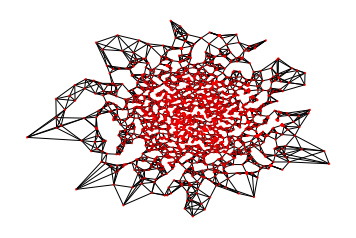

In [152]:
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph

"""
Generate m groups of n points that all have spatial variation sigma
with random coordinates. Add p additional points with spatial variation
rho. These determine the coordinates. Now, add edges to k nearest neighbors
and also within radius eps. 
""" 
def rand_size_geometric_block_model(n,m,sigma,p,rho,k,eps):
    # generate coordinates for each group mean.
    C = rho*np.random.randn(m,2)+np.array([rho/2,rho/2])
    X = np.zeros((0,2))
    for i in range(C.shape[0]):
        ng = np.random.randint(n+1)
        X = np.vstack([X,sigma/np.log10(ng)*np.random.randn(ng,2) + C[i,:]])
    # add random points. 
    X = np.vstack([X,rho*np.random.randn(p,2)])
    
    # see from sklearn.neighbors import NearestNeighbors
    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.radius_neighbors_graph.html
    A1 = kneighbors_graph(X, k, include_self=False)
    A2 = radius_neighbors_graph(X, eps, include_self=False)
    A = A1+A2
    N = nx.from_scipy_sparse_matrix(A)
    G = lgc.GraphLocal.from_networkx(N)
    G.discard_weights()
    return X,N,G

np.random.seed(1)
#X,N,G = geometric_block_model(150,10,0.05,1500,5.0,3,0.05,1)
X,N,G = rand_size_geometric_block_model(100,25,0.05,2000,5.0,5,0.06)
# add a few more edges

#plt.scatter(X[:,0], X[:,1])
G.draw(X,alpha=0.5)
G.discard_weights()


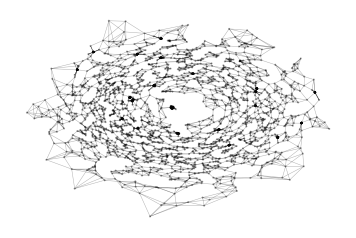

In [153]:
## See if we can get a slightly better drawing.
Xc = X-np.mean(X)
# look at each point and do a log-transform of the radial component
Xc = Xc/(2*np.max(Xc))
def radial_power(X,p):
    Xr = X.copy()
    offset = 0.00
    for i in range(Xr.shape[0]):
        #z = complex(Xr[i,0],Xr[i,1])
        r = np.linalg.norm(Xr[i,:])
        theta = np.arctan2(Xr[i,0],Xr[i,1])
        rt = (max(np.power(r+offset,p),np.power((r+offset),p)))-offset
        Xr[i,0] = rt*np.cos(theta)
        Xr[i,1] = rt*np.sin(theta)
    return Xr
#G.draw(radial_power(X,0.1))
G.draw(radial_power(Xc,0.6),edgealpha=0.3,nodesize=4,nodealpha=0.2,linewidth=0.5,nodecolor='k')
Xc = radial_power(Xc,0.6)

In [154]:
#np.argwhere(Xc[:,1] <= -0.7)
# tweak the lowest position
Xc[2878,1]=-0.71

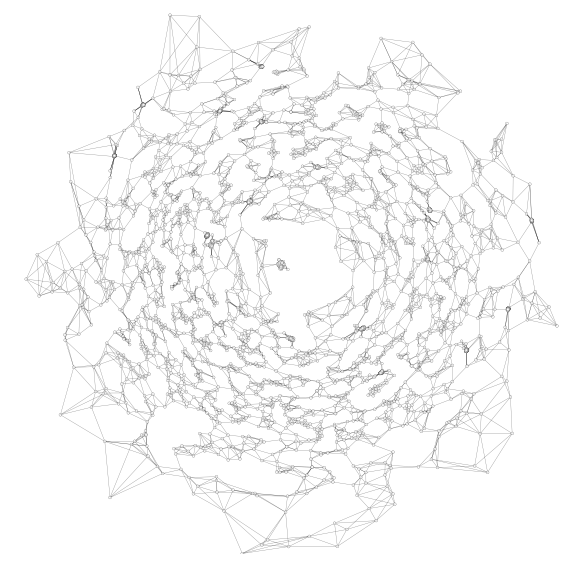

In [155]:
drawing = G.draw(Xc,edgealpha=0.5,
                 nodesize=8,nodealpha=1,
                 linewidth=0.3,nodecolor=['w'],figsize=(10,10))
drawing.nodewidth(range(G._num_vertices),0.2)
drawing.nodecolor(range(G._num_vertices),edgecolor='k',alpha=0.5)
plt.xlim([-0.712,0.64])
plt.ylim([-0.712,0.64])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

## Adjust to add few more edges

Here, we are going to find a few more nodes to fill in that center region

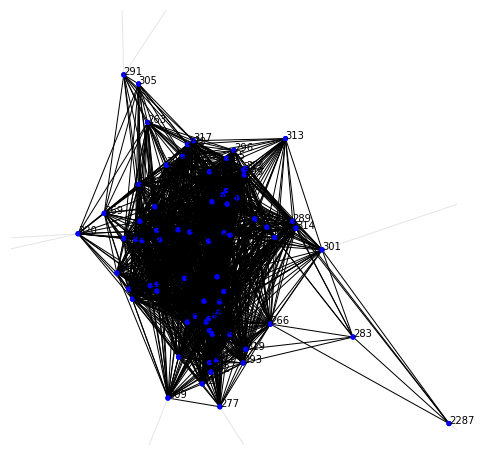

In [116]:
# This is going to label the target set 
drawing = G.draw(Xc,nodesize=2,alpha=0.5,nodecolor='#66c2a5',figsize=(8,8))
#plt.xlim([-0.2,0.2])
#plt.ylim([-0.2,0.2])
#plt.xlim([-0.13,-0.03])
#plt.ylim([-0.05,0.05])
plt.xlim([-0.07,-0.04])
plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#S = range(1500,2000)
S = [        304,  302,  295,  299,  298,  297,  296,  294,  303,  266,  279,
        292,  290,  291,  289,  288,  287,  286,  285,  284,  277,  282,
        281,  268,  267,  265,  264,  263,  259,  260,  261,  305,  262,
        269,  270,  309,  278,  271,  272,  274,  275,  276,  273,  280,
        306,  307,  308,  310,  311,  312,  313,  314,  315,  316,  317,
        318,  319,  320,  321,  322,  323,  324,  325,  326,  327,  328,
        329,  293,  283,  300,  301, 2287]

drawing.highlight(S)
for x in S:
    plt.annotate(str(x),(Xc[x,0],Xc[x,1]))

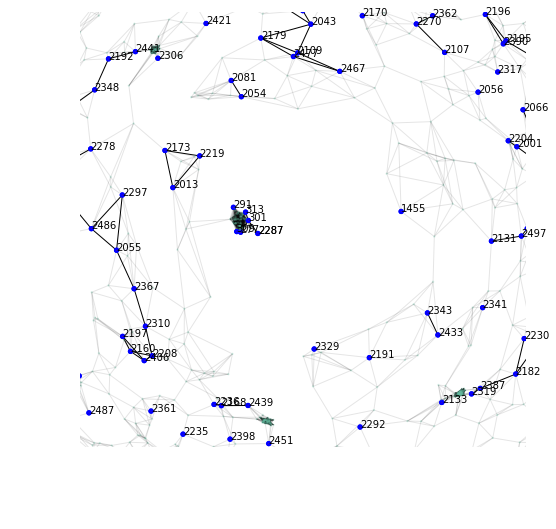

In [93]:
drawing = G.draw(Xc,nodesize=2,alpha=0.5,nodecolor='#66c2a5',figsize=(8,8))
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])
#plt.xlim([-0.13,-0.03])
#plt.ylim([-0.05,0.05])
#plt.xlim([-0.07,-0.04])
#plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#S = range(1500,2000)
S = [291,313,301,277,309,2287,1455]
S.extend(range(2000,2500))
drawing.highlight(S)
for x in S:
    plt.annotate(str(x),(Xc[x,0],Xc[x,1]))

## Edges identified

The target group is

        304,  302,  295,  299,  298,  297,  296,  294,  303,  266,  279,
        292,  290,  291,  289,  288,  287,  286,  285,  284,  277,  282,
        281,  268,  267,  265,  264,  263,  259,  260,  261,  305,  262,
        269,  270,  309,  278,  271,  272,  274,  275,  276,  273,  280,
        306,  307,  308,  310,  311,  312,  313,  314,  315,  316,  317,
        318,  319,  320,  321,  322,  323,  324,  325,  326,  327,  328,
        329,  293,  283,  300,  301, 2287
        
we are going to add edges        

2287, 1455
2287, 1932
2287, 1994
301, 1994
291, 1567
291, 1670
309, 1760
277, 2329


In [156]:
#N = nx.from_scipy_sparse_matrix(A)
newedges = [2287, 1455, 
2287, 1932,
2287, 1994,
301, 1994,
291, 1567,
291, 1670,
309, 1760,
277, 2329]
for ei in range(0,len(newedges),2):
    N.add_edge(newedges[ei],newedges[ei+1])
G = lgc.GraphLocal.from_networkx(N)
G.discard_weights()


## First show a simple drawing

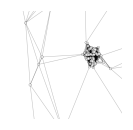

In [157]:
drawing = G.draw(Xc,edgealpha=0.25,nodesize=6,nodealpha=1,linewidth=0.5,nodecolor=['w'],figsize=(2,2))
drawing.nodewidth(range(G._num_vertices),0.2)
drawing.nodecolor(range(G._num_vertices),edgecolor='k',alpha=0.5)
plt.xlim([-0.13,-0.03])
plt.ylim([-0.05,0.05])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

## Show a fancier drawing

In [228]:
nodecolor='#fc8d62'
hicolor='#8da0cb'
bigalpha=0.18
seed = 1500
figsize=5

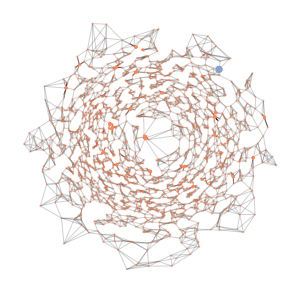

In [229]:
drawing = G.draw(Xc,nodesize=2,figsize=(figsize,figsize),nodecolor=nodecolor)
drawing.highlight([],alpha=bigalpha)
drawing.nodecolor([seed],hicolor,alpha=1)
drawing.nodesize([seed],36)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

## Spectral algorithms give us diffusions that we round. 

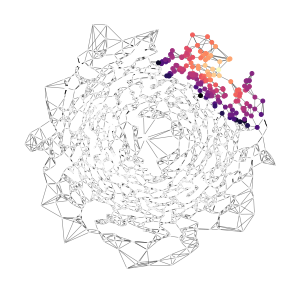

In [230]:
acl = lgc.approximate_PageRank(G,[seed],normalize=False,method='l1reg')
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[acl[0],0],Xc[acl[0],1],c=np.log10(acl[1]),cmap=plt.magma(),s=15,zorder=3)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

In [163]:
## Can we get these out of flow algorithms by randomly selecting from a reference? 

In [231]:
# Quick little example of how counters help collect the stats we need. 
from collections import Counter
Sall = Counter()
Sall.update([1,2,3])
Sall.update([2,3,4])
Sall.keys(), Sall.values()

(dict_keys([1, 2, 3, 4]), dict_values([1, 2, 2, 1]))

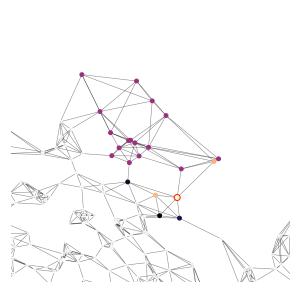

In [241]:
## Get a good reference set. 
from collections import Counter
R = G.neighbors(seed)
R.append(seed)
Sall = Counter()
for i in range(100):
    Rs = np.random.choice(R,len(R)//2,replace=False) # // is int division
    S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.001)
    Sall.update(S)

nodeset = list(Sall.keys())
nodevals = list(Sall.values())
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(figsize,figsize),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[nodeset,0],Xc[nodeset,1],c=np.log10(nodevals),cmap=plt.magma(),s=15,zorder=3)
nodecoords = Xc[nodeset,:]
drawing.nodesize([seed],36)
drawing.nodecolor([seed], 'r')
plt.xlim([np.min(nodecoords, 0)[0]-0.1,np.max(nodecoords, 0)[0]+0.1])
plt.ylim([np.min(nodecoords, 0)[1]-0.1,np.max(nodecoords,0)[1]+0.1])
#plt.ylim([-0.005,0.025])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())    

In [239]:
drawing.nodesize([seed],100)
plt.show()

In [224]:
nodecoords = Xc[nodeset,:]
np.min(nodecoords, 0)

array([-0.2408355 ,  0.02889733])

In [236]:
Sall

Counter({979: 58,
         980: 58,
         981: 58,
         1263: 58,
         1280: 58,
         1419: 58,
         1450: 58,
         1500: 70,
         1676: 58,
         1730: 58,
         1974: 44,
         2025: 69,
         2098: 58,
         2247: 65,
         2354: 58,
         2365: 32,
         2452: 58,
         2494: 58,
         2515: 58,
         2933: 58,
         3074: 58,
         3212: 52})

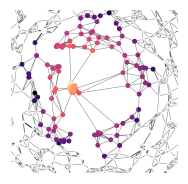

In [196]:
acl = lgc.approximate_PageRank(G,[seed],normalize=False,method='l1reg')
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(3,3),edgealpha=0.5,nodecolor='w')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().scatter(Xc[acl[0],0],Xc[acl[0],1],c=np.log10(acl[1]),cmap=plt.magma(),s=15,zorder=3)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.gcf().savefig("geograph-"+str(seed)+"-l1reg-vec.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
#plt.gcf().savefig("geograph-"+str(seed)+"-l1reg-vec.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)

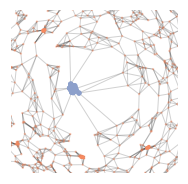

In [150]:
R,cond = lgc.spectral_clustering(G,[305],method='l1reg')
S,cond = lgc.flow_clustering(G,R,method='mqi')
drawing = G.draw(Xc,nodesize=2,figsize=(3,3),nodecolor=nodecolor)
drawing.highlight(S,alpha=bigalpha)
drawing.nodecolor(S,hicolor)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.gcf().savefig("geograph-"+str(seed)+"-l1reg-mqi.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
#plt.gcf().savefig("geograph-"+str(seed)+"-l1reg-mqi.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)

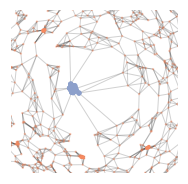

In [242]:
R = G.neighbors(305)
R.append(305)
S,cond = lgc.flow_clustering(G,R,method='sl',delta=0.001)
#S = R
drawing = G.draw(Xc,nodesize=2,figsize=(3,3),nodecolor=nodecolor)
drawing.highlight(S,alpha=bigalpha)
drawing.nodecolor(S,hicolor)
plt.xlim([-0.22,0.22])
plt.ylim([-0.22,0.22])
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.gcf().savefig("geograph-"+str(seed)+"-neigh-sl.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
#plt.gcf().savefig("geograph-"+str(seed)+"-neigh-sl.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)

In [243]:
len(S)

72

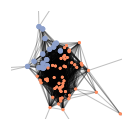

In [143]:
# Show a zoom in on the neighborhood
R = G.neighbors(305)
R.append(305)
S = R

drawing = G.draw(Xc,nodesize=4,figsize=(2,2),nodecolor=nodecolor)
drawing.highlight([],alpha=0.25)
drawing.highlight([],otheredges=True,alpha=1)
plt.xlim([-0.07,-0.04])
plt.ylim([-0.005,0.025])
drawing.nodecolor(S,hicolor,alpha=1)
drawing.nodesize(S,18)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().savefig("geograph-"+str(seed)+"-neigh-zoom.pdf",bbox_inches='tight',pad_inches=0,transparent=True)
plt.gcf().savefig("geograph-"+str(seed)+"-neigh-zoom.pdf",bbox_inches='tight',pad_inches=0,transparent=True,dpi=600)

In [24]:
Sacl,condacl = lgc.spectral_clustering(G,[320],method="acl") # one step
print(condacl)
Smqi,condmqi = lgc.flow_clustering(G,Sacl,method="mqi")
print(condmqi)



0.002787068004459309
0.0005704506560182544


(-0.2, 0.1)

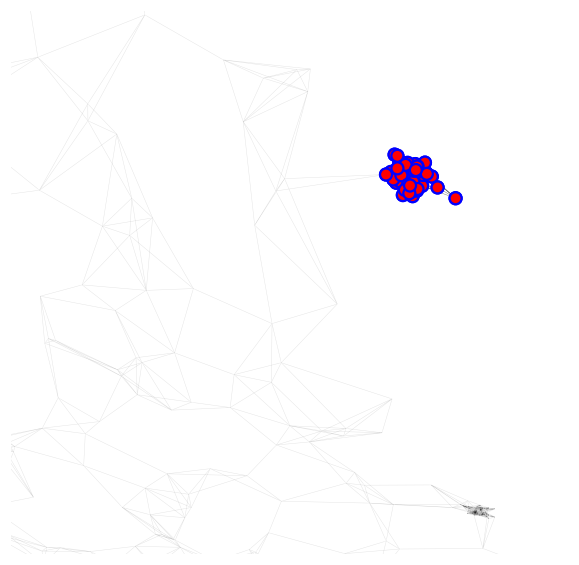

In [25]:
drawing = G.draw(Xc,nodesize=8,nodealpha=0.5,linewidth=0.5,
                 figsize=(10,10),edgealpha=0.5,nodecolor='w')
drawing.highlight(Smqi)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.xlim([-0.2,0])
plt.ylim([-0.2,0.1])

0.03540903540903541
0.02711323763955343
0.007503410641200546


Text(0.5,1,'SimpleLocal -- $\\phi = 0.0075$')

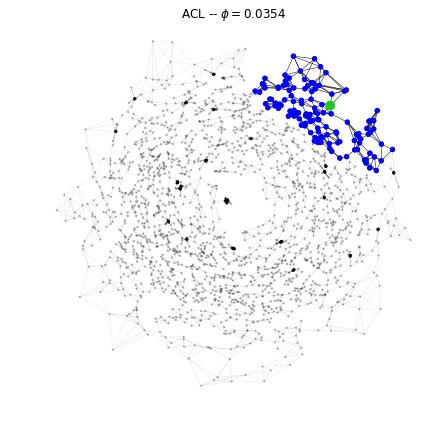

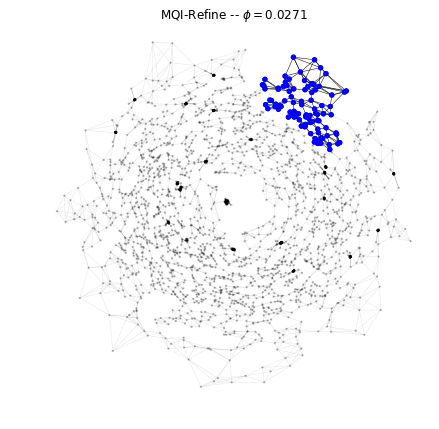

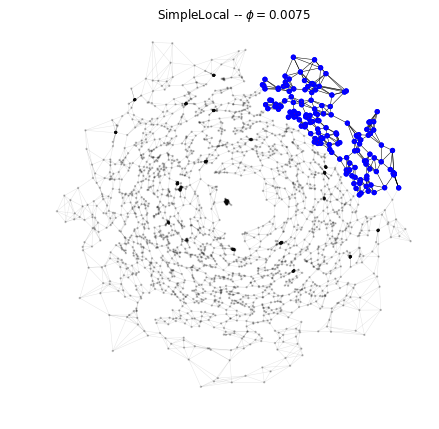

In [26]:
seed = [1500]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5,figsize=(7,7))
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.title(r'ACL -- $\phi = %.4f$'%(cond))
print(cond)


R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5,figsize=(7,7))
drawing.highlight(R)
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.001)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5,figsize=(7,7))
drawing.highlight(R)
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))


In [ ]:
def ncpsetview(g,pos,ax=None,ncp=None,nbins=20,rholist=[1e-2,1e-3,1e-4]):
    fig,axs = plt.subplots(4,5, figsize=(8,8))
    axs = axs.flatten()
    
    # We need to be a bit hacky here because feature_by_group_min_line
    # assumes you are plotting. So if the ax=None, then we don't want
    # to plot the line at all, instead, what we do is just plot 
    # to the first set of axes that will get the graph eventually.
    # then we clear
    
    if ax is None:
        lineax = axs[0]
    else:
        lineax = ax
    if ncp is None:
        ncp = lgc.NCPData(g).approxPageRank(rholist=rholist)
    setdata = lgc.NCPPlots(ncp).feature_by_group_min_line(
            "output_cond","output_sizeeff", ax=lineax, label="", nbins=nbins)
    if ax is None: 
        lineax.clear()
    for ax in axs:
        ax.axis('off')
    for i,d in enumerate(setdata):
        S,cond = ncp.output_set(int(d[2])) # get the output set
        #SN = [ id2nx[v] for v in S ]
        #R = set(N)
        #R -= set(SN)
        # make sure we always look at the small size
        #if len(R) < len(SN):
            #R, SN = SN, R # swap!
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], alpha=0.5, node_size=8)
        #print(S)
        
        drawing = g.draw(pos,axs=axs[i],linewidth=0.5,edgealpha=0.3,nodecolor='k',nodesize=2,nodealpha=0.5)
        drawing.highlight(S)
        
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], alpha=0.5, node_size=2, node_color='k', nodelist=list(R))
        #nx.draw_networkx_nodes(N, pos, ax=axs[i], node_size=14, nodelist=list(SN), node_color='r')
        #nx.draw_networkx_edges(N, pos, ax=axs[i], alpha=0.5, width=0.5)
        axs[i].set_title('|S|=' + str(len(S)) + '\ncond=%.4f'%(d[1]),fontsize=10)
        axs[i].axis('tight')
    return fig
ncpsetview(G,Xc,ncp=ncp)


In [27]:
seed = [320]
S,cond = lgc.spectral_clustering(G,seed)

In [28]:
S,cond

(array([ 320, 1885, 2831, 1954, 1760,  305, 2982, 2013,  269,  263,  328,
         308,  287,  298, 1382, 2930, 2219,  282,  286,  280,  278,  267,
         270,  260,  316, 2173,  290,  276,  294,  271,  291, 1611,  279,
         317,  326, 1372,  262,  284,  297,  265,  296,  281,  324,  272,
         312,  309,  274,  306,  318,  322,  285,  323,  288,  304,  321,
         303,  315,  307,  327,  299,  261,  310,  311,  275,  268,  329,
         325,  295,  302,  259,  292,  273,  264,  277,  293,  319,  313,
         300,  289,  314,  266,  301, 2850,  283, 2664, 2287], dtype=uint32),
 0.002787068004459309)

(-0.2, 0.1)

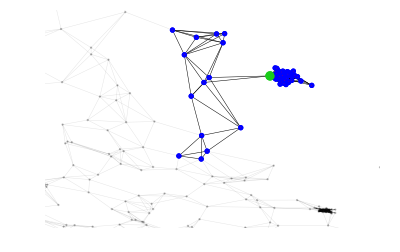

In [29]:
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([-0.2,0])
plt.ylim([-0.2,0.1])

In [30]:
R,cond = lgc.flow_clustering(G,S,method="mqi")
cond

0.0005704506560182544

(-0.2, 0.2)

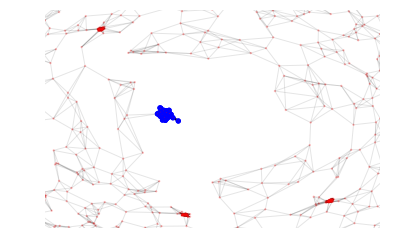

In [31]:
drawing = G.draw(Xc,nodesize=2)
drawing.highlight(R)
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])

0.02702702702702703
0.024657534246575342


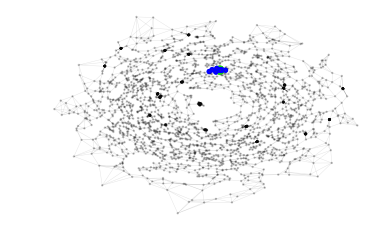

In [69]:

seed = [180]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
#plt.xlim([-0.2,0])
#plt.ylim([-0.2,0.1])
print(cond)
R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)

0.024657534246575342
0.024657534246575342


Text(0.5, 1.0, 'SimpleLocal -- $\\phi = 0.0247$')

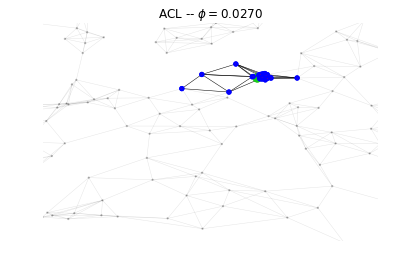

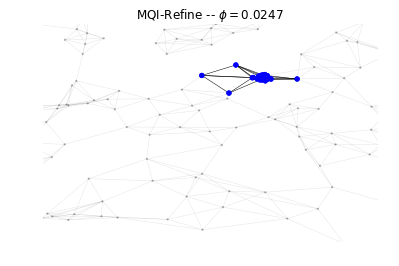

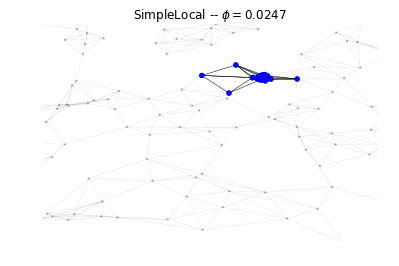

In [8]:

seed = [180]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([-0.1,0.1])
plt.ylim([0.1,0.3])
plt.title(r'ACL -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.1,0.1])
plt.ylim([0.1,0.3])
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.1)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.1,0.1])
plt.ylim([0.1,0.3])
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))

0.013618677042801557
0.009881422924901186
0.0012590494176896443


Text(0.5, 1.0, 'SimpleLocal -- $\\phi = 0.0013$')

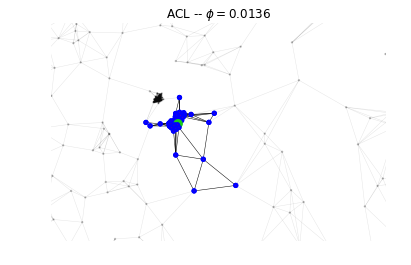

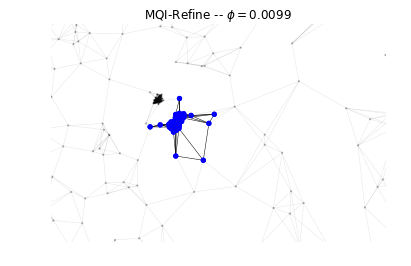

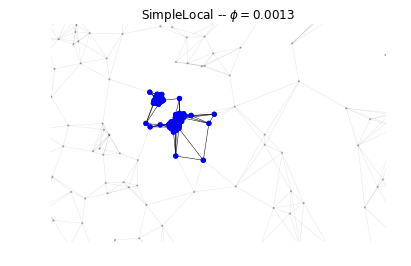

In [9]:
seed = [1000]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([-0.3,-0.1])
plt.ylim([-0.05,0.15])
plt.title(r'ACL -- $\phi = %.4f$'%(cond))
print(cond)


R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.3,-0.1])
plt.ylim([-0.05,0.15])
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.01)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([-0.3,-0.1])
plt.ylim([-0.05,0.15])
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))

0.03540903540903541
0.02711323763955343
0.007503410641200546


Text(0.5, 1.0, 'SimpleLocal -- $\\phi = 0.0075$')

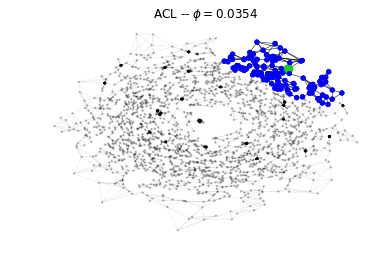

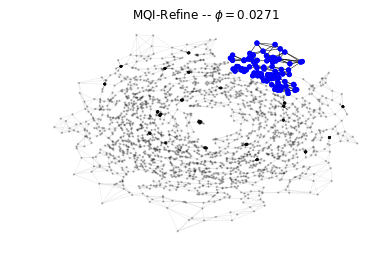

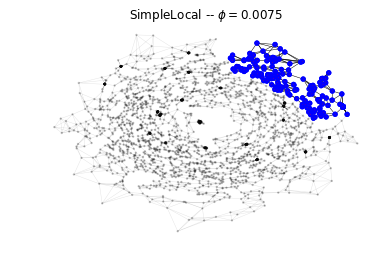

In [15]:
seed = [1500]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.title(r'ACL -- $\phi = %.4f$'%(cond))
print(cond)


R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="sl",delta=0.001)
print(cond)


drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.title(r'SimpleLocal -- $\phi = %.4f$'%(cond))


In [16]:
len(R)

207

0.003376748673420164


Text(0.5, 1.0, 'MQI-Refine -- $\\phi = 0.0034$')

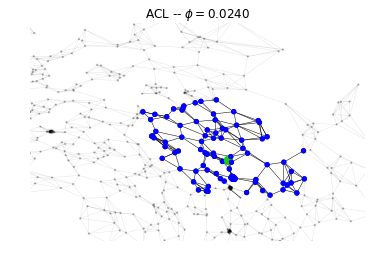

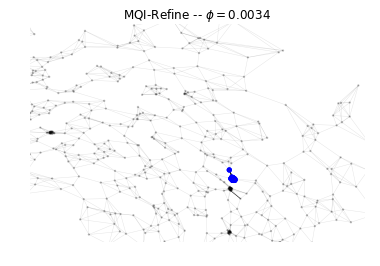

In [81]:

seed = [1800]
S,cond = lgc.spectral_clustering(G,seed)
cond
drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(S)
#drawing.highlight(seed,size=10)
#drawing.nodecolor(seed,'r')
drawing.nodecolor(seed,[0.1,0.8,0.1])
drawing.nodesize(seed,50)
plt.xlim([0.0,0.5])
plt.ylim([0.0,0.5])
plt.title(r'ACL -- $\phi = %.4f$'%(cond))

R,cond = lgc.flow_clustering(G,S,method="mqi")
print(cond)

drawing = G.draw(Xc,nodesize=2,nodecolor='k',linewidth=0.5)
drawing.highlight(R)
plt.xlim([0.0,0.5])
plt.ylim([0.0,0.5])
plt.title(r'MQI-Refine -- $\phi = %.4f$'%(cond))

In [68]:
R,cond = lgc.flow_clustering(G,S,method="mqi")
cond

0.024657534246575342